# Experiments - B2BW2W compared with Experts and Mab
of the last added functionalities in onlineSG

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import source.game as game
import source.player as player
import source.environment as environment
import source.errors as errors
import source.parsers as parsers
import source.players.attackers as attackers
import source.players.base_defenders as base_defenders
import source.players.defenders as defenders
import source.runner as runner
import source.players.detection as detection 

import source.util as util
import numpy as np
import pandas as pd
from importlib import *
import source.util as util
from copy import deepcopy, copy

In [32]:
# if you change something in the files, don't forget to reload
reload(player)
reload(base_defenders)
reload(attackers)
reload(defenders)
reload(errors)
reload(runner)
reload(parsers)
reload(game)
reload(environment)
reload(detection)
reload(util)

<module 'source.util' from '/home/lorenzo/Scrivania/Polimi/Thesis/code/onlineSG/source/util.py'>

## Generating game and distributions

In [4]:
time_horizon = 1000

In [6]:
T = 5 #np.random.randint(2,10)
targets = util.gen_targets(T, low=1, high=10)
distributions = []
for i in range(20):
    distributions.append(tuple(util.gen_distr(T)))
values = tuple((v, v) for v in targets)
g = game.Game(values, time_horizon)
g.attackers = [1]
g.defenders = [0]
print(T, targets)
att = [attackers.StackelbergAttacker(g, 1)]
br = [att[0].get_best_responder().compute_strategy()]
for d in distributions:
    print(d)
    att.append(attackers.StochasticAttacker(g, 1, 1, *d))
    br.append(att[-1].get_best_responder().compute_strategy())

5 [5, 8, 6, 4, 3]
(0.01, 0.9, 0.05, 0.01, 0.03)
(0.24, 0.05, 0.04, 0.55, 0.12)
(0.42, 0.19, 0.19, 0.09, 0.11)
(0.03, 0.13, 0.73, 0.0, 0.11)
(0.04, 0.11, 0.2, 0.63, 0.02)
(0.96, 0.02, 0.01, 0.0, 0.01)
(0.2, 0.03, 0.16, 0.43, 0.18)
(0.57, 0.06, 0.22, 0.03, 0.12)
(0.16, 0.04, 0.04, 0.01, 0.75)
(0.0, 0.95, 0.04, 0.01, 0.0)
(0.0, 0.13, 0.18, 0.48, 0.21)
(0.02, 0.4, 0.23, 0.03, 0.32)
(0.44, 0.02, 0.09, 0.42, 0.03)
(0.01, 0.0, 0.35, 0.64, 0.0)
(0.11, 0.11, 0.11, 0.11, 0.56)
(0.01, 0.69, 0.07, 0.05, 0.18)
(0.01, 0.28, 0.21, 0.3, 0.2)
(0.13, 0.78, 0.07, 0.01, 0.01)
(0.52, 0.08, 0.25, 0.13, 0.02)
(0.02, 0.06, 0.33, 0.32, 0.27)


## Loss gap

In [74]:
a = att[3]
norm = max([v[0] for v in a.game.values]) - a.opt_loss()
for b in att:
    if a != b:
        print(util.difficulty(a,b).gap/norm)#, br[att.index(a)], br[att.index(b)])

0.12779296519045005
0.12473118279569893
0.3741935483870967
0.2064516129032257
0.3741935483870967
0.0
0.3741935483870967
0.0
0.38064516129032255
0.12473118279569893
0.3741935483870967
0.12473118279569893
0.0
0.3741935483870967
0.38064516129032255
0.12473118279569893
0.12473118279569893
0.12473118279569893
0.0
0.2064516129032257


## Loss gap of Stackelberg against True Stochastic

In [4]:
for i,a in enumerate(att[1:]):
    print(difficulty(a, att[0]), i+1)

Difficulty(gap=2.9657627118644063, norm_gap=0.4261153321644262, similarity=0) 1
Difficulty(gap=1.0450847457627117, norm_gap=0.20859974965323588, similarity=0) 2
Difficulty(gap=3.987796610169492, norm_gap=0.5035096730011985, similarity=0) 3
Difficulty(gap=3.67406779661017, norm_gap=0.4790179656597353, similarity=0) 4
Difficulty(gap=1.8072881355932195, norm_gap=0.25598982090555517, similarity=0) 5
Difficulty(gap=3.3040677966101692, norm_gap=0.43646866533819934, similarity=0) 6
Difficulty(gap=3.4044067796610173, norm_gap=0.45452693987463516, similarity=0) 7
Difficulty(gap=0.4642372881355934, norm_gap=0.07427796610169494, similarity=0) 8
Difficulty(gap=2.53271186440678, norm_gap=0.33950561185077477, similarity=0) 9
Difficulty(gap=0.09372881355932217, norm_gap=0.022585256279354735, similarity=0) 10
Difficulty(gap=1.2552542372881355, norm_gap=0.20713766291883426, similarity=0) 11
Difficulty(gap=0.6223728813559322, norm_gap=0.12966101694915255, similarity=0) 12
Difficulty(gap=0.92728813559322

## Sorted Loss gap

In [98]:
a = att[0]
others = sorted([o for o in att if o!=a], key=lambda x: util.difficulty(a,x).gap)

In [111]:
a

<StackelbergAttacker id:1 resources:1>

In [99]:
[(att.index(o), util.difficulty(a, o)) for o in others]

[(1,
  Difficulty(gap=1.9322033898305078, norm_gap=0.4913793103448275, similarity=0)),
 (10,
  Difficulty(gap=1.9322033898305078, norm_gap=0.4913793103448275, similarity=0)),
 (12,
  Difficulty(gap=1.9322033898305078, norm_gap=0.4913793103448275, similarity=0)),
 (16,
  Difficulty(gap=1.9322033898305078, norm_gap=0.4913793103448275, similarity=0)),
 (17,
  Difficulty(gap=1.9322033898305078, norm_gap=0.4913793103448275, similarity=0)),
 (18,
  Difficulty(gap=1.9322033898305078, norm_gap=0.4913793103448275, similarity=0)),
 (2, Difficulty(gap=3.9322033898305078, norm_gap=1.0, similarity=0)),
 (3, Difficulty(gap=3.9322033898305078, norm_gap=1.0, similarity=0)),
 (4, Difficulty(gap=3.9322033898305078, norm_gap=1.0, similarity=0)),
 (5, Difficulty(gap=3.9322033898305078, norm_gap=1.0, similarity=0)),
 (6, Difficulty(gap=3.9322033898305078, norm_gap=1.0, similarity=0)),
 (7, Difficulty(gap=3.9322033898305078, norm_gap=1.0, similarity=0)),
 (8, Difficulty(gap=3.9322033898305078, norm_gap=1.0,

In [100]:
chosen = [4,11,13, 18]
[util.difficulty(a, o) for i,o in enumerate(att) if i in chosen]

[Difficulty(gap=3.9322033898305078, norm_gap=1.0, similarity=0),
 Difficulty(gap=3.9322033898305078, norm_gap=1.0, similarity=0),
 Difficulty(gap=3.9322033898305078, norm_gap=1.0, similarity=0),
 Difficulty(gap=1.9322033898305078, norm_gap=0.4913793103448275, similarity=0)]

## Choosing Profiles

In [1]:
def print_header(targets, profiles):
    return "Name,T," + ",".join(str(i) for i in range(len(targets))) + ",Defender,Attacker," + ",".join(["Profile" for x in range(len(profiles[0]['others']))])+"\n" 

In [45]:
def print_row(targets, time_horizon,d,p):
    return ",".join([str(i) for i in ([d+"_vs_"+str(p["i"])] + [time_horizon] + targets + [d] + [p["attacker"]] + [x for x in p["others"]]) ])+"\n"

In [185]:
distr1 = [0.18644067796610167, 0.49152542372881375, 0.3220338983050846, 0.0, 0.0]
distr2 = [1/3, 1/3, 1/3, 0.0, 0.0]
sto1 = attackers.StochasticAttacker(g, 1, 1, *distr1)
sto2 = attackers.StochasticAttacker(g, 1, 1, *distr2)

In [186]:
profiles = []
#profiles.append({"attacker": print_adv(a), "profile1": print_sto(att[19]), "profile2": print_sto(att[4])})
profiles.append({"attacker": util.print_adv(att[0]), 
                 "others": [util.print_adv(sto1),
                            util.print_adv(sto2)], "i": 3})
#profiles.append({"attacker": util.print_adv(att[11]), "profile1": util.print_adv(att[0]), "i": 11})
#profiles.append({"attacker": util.print_adv(att[4]), "profile1": util.print_adv(att[0]), "i": 4})
#for l in chosen:
 #   profiles.append({"attacker": print_adv(a), "profile1": print_adv(others[l]), "i": l})

In [202]:
(print_header(targets, profiles))

'Name,T,0,1,2,3,4,Defender,Attacker,Profile,Profile,Profile\n'

In [188]:
defender = ["br_mab1-1", "br_expert1-1-1","b2bw2w1"] #,"holmes1-1"]

### Writing batch file

In [59]:
mkdir ../Experiments/Experiment1

In [213]:
folder = "../Experiments/Experiment1"
batch_name = "expert_mab4"
batch_file = batch_name + ".csv"
batch_path = folder + "/" + batch_file

In [214]:
with open(batch_path, "w+") as f:
    #f.write("Name,T,0,1,2,3,4,Defender,Attacker,Profile,Profile\n")
    f.write(print_header(targets, profiles))
    for p in profiles :
        for d in defender: 
            f.write(print_row(targets, time_horizon,d,p))
            #f.write(",".join([str(i) for i in ([d] + [time_horizon] + targets + [d] + [p["attacker"]] +[p["profile1"]] + [p["profile2"]])])+ "\n")

In [215]:
pd.read_csv(batch_path)

,Name,T,0,1,2,3,4,Defender,Attacker,Profile,Profile.1
0,br_mab1-1_vs_3,1000,5,8,6,4,3,br_mab1-1,stackelberg1,stochastic_attacker1-0.18644067796610167-0.491...,stochastic_attacker1-0.3333333333333333-0.3333...
1,br_expert1-1-1_vs_3,1000,5,8,6,4,3,br_expert1-1-1,stackelberg1,stochastic_attacker1-0.18644067796610167-0.491...,stochastic_attacker1-0.3333333333333333-0.3333...
2,b2bw2w1_vs_3,1000,5,8,6,4,3,b2bw2w1,stackelberg1,stochastic_attacker1-0.18644067796610167-0.491...,stochastic_attacker1-0.3333333333333333-0.3333...


# Run

In [216]:
b = runner.Batch(batch_path, folder)

In [218]:
b.parse_batch()

In [224]:
b.run(10, True)
c = b.configurations
end_sound()

## Plots

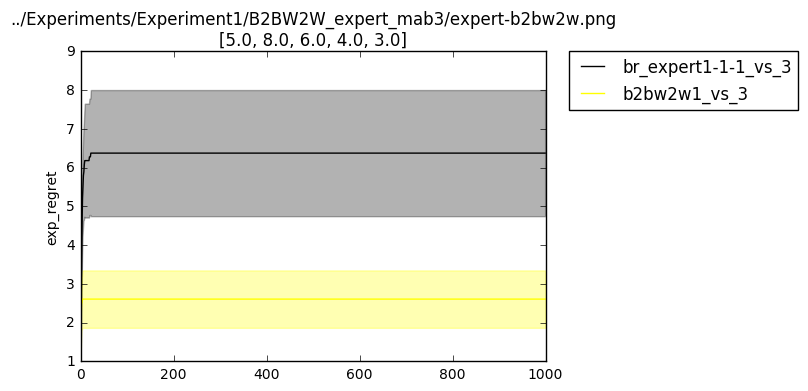

In [227]:
util.plot_conf("exp_regret", c[1:], b.results_folder_path, "expert-b2bw2w")

## Experiments

In [278]:
g = deepcopy(c[1].game)

In [279]:
e = runner.Experiment(g)

In [331]:
e.run_interaction()
print(e.game.strategy_history[-1])
print(e.agent.avg_rewards)
print(util.game_str(e.game, lenght=7))

{0: [0.18644067796610167, 0.49152542372881375, 0.3220338983050846, 0.0, 0.0], 1: [1, 0, 0, 0, 0]}
{<KnownStochasticDefender id:0 resources:1>: -5.058823529411764, <StackelbergDefender id:0 resources:1>: -3.6666666666666665, <KnownStochasticDefender id:0 resources:1>: -5.058823529411764}
 	□	 	 	 	
5.0	8.0	6.0	4.0	3.0	
 	 	△	 	 	
-----------------------------------
 	□	 	 	 	
5.0	8.0	6.0	4.0	3.0	
△	 	 	 	 	
-----------------------------------
 	□	 	 	 	
5.0	8.0	6.0	4.0	3.0	
 	 	△	 	 	
-----------------------------------
 	□	 	 	 	
5.0	8.0	6.0	4.0	3.0	
 	 	△	 	 	
-----------------------------------
 	□	 	 	 	
5.0	8.0	6.0	4.0	3.0	
 	 	△	 	 	
-----------------------------------
□	 	 	 	 	
5.0	8.0	6.0	4.0	3.0	
△	 	 	 	 	
-----------------------------------
 	 	□	 	 	
5.0	8.0	6.0	4.0	3.0	
△	 	 	 	 	
-----------------------------------
 	□	 	 	 	
5.0	8.0	6.0	4.0	3.0	
△	 	 	 	 	
-----------------------------------
□	 	 	 	 	
5.0	8.0	6.0	4.0	3.0	
△	 	 	 	 	
-----------------------------------
 

In [167]:
[p.compute_strategy() for p in e.agent.profiles]

[[0, 1, 0, 0, 0],
 [0.03, 0.13, 0.73, 0.0, 0.11],
 [0.0, 0.13, 0.18, 0.48, 0.21],
 [0.44, 0.02, 0.09, 0.42, 0.03]]

In [176]:
e.run()

{'actual_regret': 0.20338983050769333,
 'exp_regret': 3.9322033898296205,
 'total_rewards': -4068.0}

In [184]:
[v for k,v in e.agent.arms.items()][2].compute_strategy()

[0.18644067796610167, 0.49152542372881375, 0.3220338983050846, 0.0, 0.0]

In [229]:
import os

In [243]:
def end_sound():
    os.system("( speaker-test -t sine -f 1000 )& pid=$! ; sleep 0.2s ; kill -9 $pid")

In [236]:
import sys
sys.stdout.write('\a')
sys.stdout.flush()



In [244]:
end_sound()